In [10]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key
# Import the datetime module from the datetime library.
from datetime import datetime

# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [11]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(-90.000, 90.000, size=1500)
lngs = np.random.uniform(-180.000, 180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [12]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [13]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [14]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

585

In [15]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | busselton
Processing Record 2 of Set 1 | coquimbo
Processing Record 3 of Set 1 | hermanus
Processing Record 4 of Set 1 | mataura
Processing Record 5 of Set 1 | buala
Processing Record 6 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 7 of Set 1 | longyearbyen
Processing Record 8 of Set 1 | cidreira
Processing Record 9 of Set 1 | albany
Processing Record 10 of Set 1 | tura
Processing Record 11 of Set 1 | bathsheba
Processing Record 12 of Set 1 | san patricio
Processing Record 13 of Set 1 | northam
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | rikitea
Processing Record 16 of Set 1 | cherskiy
Processing Record 17 of Set 1 | thompson
Processing Record 18 of Set 1 | chuy
Processing Record 19 of Set 1 | bredasdorp
Processing Record 20 of Set 1 | kavieng
Processing Record 21 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 22 of S

Processing Record 35 of Set 4 | cedar city
Processing Record 36 of Set 4 | deputatskiy
Processing Record 37 of Set 4 | mount gambier
Processing Record 38 of Set 4 | bengkulu
Processing Record 39 of Set 4 | fairbanks
Processing Record 40 of Set 4 | samusu
City not found. Skipping...
Processing Record 41 of Set 4 | nichinan
Processing Record 42 of Set 4 | eydhafushi
Processing Record 43 of Set 4 | tiksi
Processing Record 44 of Set 4 | chicama
Processing Record 45 of Set 4 | pendleton
Processing Record 46 of Set 4 | te anau
Processing Record 47 of Set 4 | sorvag
City not found. Skipping...
Processing Record 48 of Set 4 | pangody
Processing Record 49 of Set 4 | karamea
City not found. Skipping...
Processing Record 50 of Set 4 | luebo
Processing Record 1 of Set 5 | torbay
Processing Record 2 of Set 5 | lalibela
Processing Record 3 of Set 5 | saldanha
Processing Record 4 of Set 5 | galiwinku
City not found. Skipping...
Processing Record 5 of Set 5 | launceston
Processing Record 6 of Set 5 | 

City not found. Skipping...
Processing Record 20 of Set 8 | san cristobal
Processing Record 21 of Set 8 | benemerito de las americas
Processing Record 22 of Set 8 | puerto baquerizo moreno
Processing Record 23 of Set 8 | rawson
Processing Record 24 of Set 8 | awbari
Processing Record 25 of Set 8 | mercedes
Processing Record 26 of Set 8 | miraflores
Processing Record 27 of Set 8 | victor harbor
Processing Record 28 of Set 8 | marsabit
Processing Record 29 of Set 8 | xiongyue
Processing Record 30 of Set 8 | hovd
Processing Record 31 of Set 8 | boa vista
Processing Record 32 of Set 8 | buritis
Processing Record 33 of Set 8 | nargana
Processing Record 34 of Set 8 | urazovo
Processing Record 35 of Set 8 | dudinka
Processing Record 36 of Set 8 | ngukurr
City not found. Skipping...
Processing Record 37 of Set 8 | bontang
Processing Record 38 of Set 8 | aguimes
Processing Record 39 of Set 8 | severnyy
Processing Record 40 of Set 8 | frankfort
Processing Record 41 of Set 8 | tarnogskiy gorodok


Processing Record 11 of Set 12 | vanavara
Processing Record 12 of Set 12 | sabang
Processing Record 13 of Set 12 | tomatlan
Processing Record 14 of Set 12 | ucluelet
Processing Record 15 of Set 12 | saint-georges
Processing Record 16 of Set 12 | wajid
Processing Record 17 of Set 12 | vestmanna
Processing Record 18 of Set 12 | verkhnevilyuysk
Processing Record 19 of Set 12 | tarko-sale
Processing Record 20 of Set 12 | shimanovsk
Processing Record 21 of Set 12 | meyungs
City not found. Skipping...
Processing Record 22 of Set 12 | kurilsk
Processing Record 23 of Set 12 | haren
Processing Record 24 of Set 12 | altea
Processing Record 25 of Set 12 | newport
Processing Record 26 of Set 12 | gimli
Processing Record 27 of Set 12 | the valley
Processing Record 28 of Set 12 | weiser
Processing Record 29 of Set 12 | ust-tsilma
Processing Record 30 of Set 12 | da lat
Processing Record 31 of Set 12 | bouna
Processing Record 32 of Set 12 | vangaindrano
Processing Record 33 of Set 12 | surt
Processin

In [16]:
len(city_data)

532

In [17]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Busselton,-33.65,115.33,54.00,85,0,10.40,AU,2020-10-22 23:15:21
1,Coquimbo,-29.95,-71.34,55.40,82,75,9.17,CL,2020-10-22 23:12:19
2,Hermanus,-34.42,19.23,64.00,86,51,4.00,ZA,2020-10-22 23:15:21
3,Mataura,-46.19,168.86,63.00,58,86,8.01,NZ,2020-10-22 23:15:21
4,Buala,-8.14,159.59,85.19,65,57,5.44,SB,2020-10-22 23:15:23
5,Longyearbyen,78.22,15.64,17.60,85,20,10.29,SJ,2020-10-22 23:15:23
6,Cidreira,-30.18,-50.21,65.75,86,98,24.63,BR,2020-10-22 23:15:23
7,Albany,42.60,-73.97,64.00,78,49,2.37,US,2020-10-22 23:15:06
8,Tura,25.52,90.22,69.73,96,94,2.59,IN,2020-10-22 23:15:23
9,Bathsheba,13.22,-59.52,82.40,78,40,13.87,BB,2020-10-22 23:15:23


In [18]:
arranged_city_data = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[arranged_city_data]

In [19]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Busselton,AU,2020-10-22 23:15:21,-33.65,115.33,54.00,85,0,10.40
1,Coquimbo,CL,2020-10-22 23:12:19,-29.95,-71.34,55.40,82,75,9.17
2,Hermanus,ZA,2020-10-22 23:15:21,-34.42,19.23,64.00,86,51,4.00
3,Mataura,NZ,2020-10-22 23:15:21,-46.19,168.86,63.00,58,86,8.01
4,Buala,SB,2020-10-22 23:15:23,-8.14,159.59,85.19,65,57,5.44
5,Longyearbyen,SJ,2020-10-22 23:15:23,78.22,15.64,17.60,85,20,10.29
6,Cidreira,BR,2020-10-22 23:15:23,-30.18,-50.21,65.75,86,98,24.63
7,Albany,US,2020-10-22 23:15:06,42.60,-73.97,64.00,78,49,2.37
8,Tura,IN,2020-10-22 23:15:23,25.52,90.22,69.73,96,94,2.59
9,Bathsheba,BB,2020-10-22 23:15:23,13.22,-59.52,82.40,78,40,13.87


In [20]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [21]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [22]:
import time

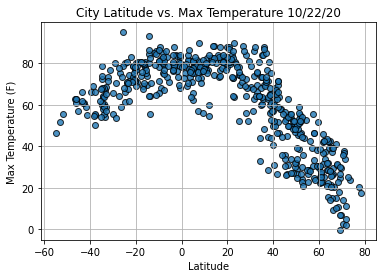

In [23]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

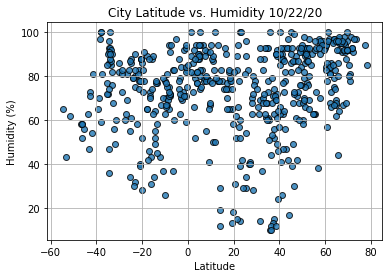

In [24]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

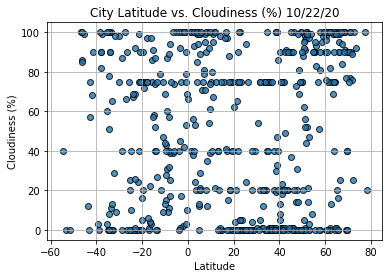

In [25]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

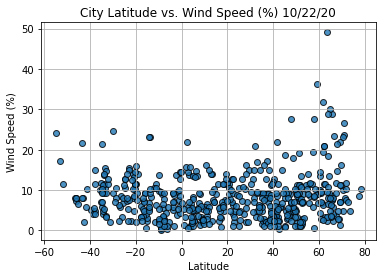

In [26]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed (%) " + time.strftime("%x"))
plt.ylabel("Wind Speed (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [36]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [37]:
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

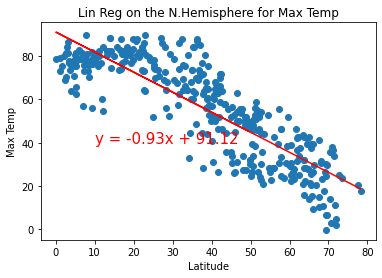

In [38]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Lin Reg on the N.Hemisphere for Max Temp", 
                       'Max Temp',(10,40))

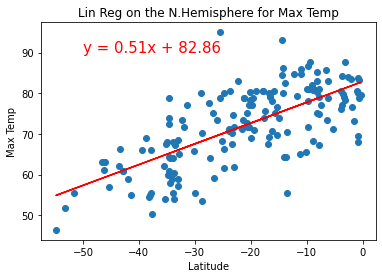

In [39]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Lin Reg on the N.Hemisphere for Max Temp",
                       "Max Temp",(-50,90))

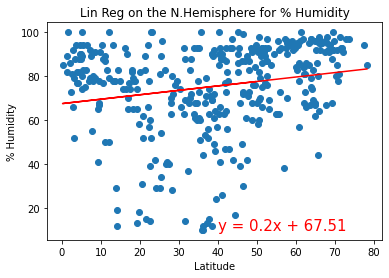

In [41]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Lin Reg on the N.Hemisphere for % Humidity',
                       '% Humidity',(40,10))

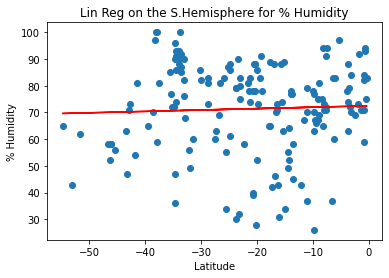

In [43]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Lin Reg on the S.Hemisphere for % Humidity',
                       '% Humidity',(-50,15))

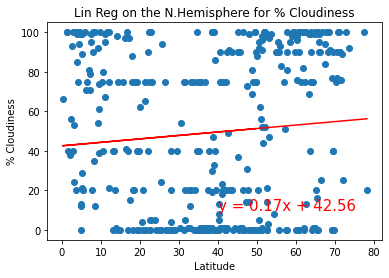

In [44]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Lin Reg on the N.Hemisphere for % Cloudiness',
                       '% Cloudiness',(40,10))

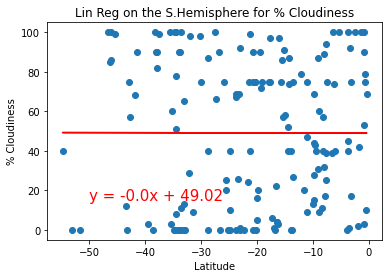

In [45]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Lin Reg on the S.Hemisphere for % Cloudiness',
                       '% Cloudiness',(-50,15))

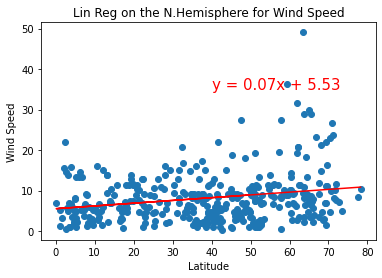

In [46]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Lin Reg on the N.Hemisphere for Wind Speed',
                       'Wind Speed',(40,35))

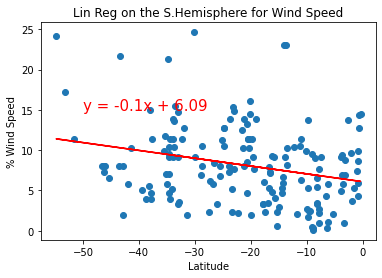

In [47]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Lin Reg on the S.Hemisphere for Wind Speed',
                       '% Wind Speed',(-50,15))